<a href="https://colab.research.google.com/github/m-adil172000/Omdena_MindGuardian/blob/main/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
import json

# Try to load and clean the JSON data
with open('mental_health_counseling_conversations (1).json', 'r') as f:
    # Read the file content
    file_content = f.read()
    # Try to fix potential issues by removing trailing characters
    cleaned_content = file_content.rstrip()

    try:
        # Attempt to load the cleaned JSON data
        data = pd.read_json(json.loads(cleaned_content))
        print(data.head())
    except ValueError as e:
        print(f"Error loading JSON: {e}")

Error loading JSON: Extra data: line 2 column 1 (char 1335)


In [3]:
data = []
with open('mental_health_counseling_conversations (1).json', 'r') as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except:
            pass
df = pd.DataFrame(data)

In [4]:
df.head()

,Context,Response
0,I'm going through some things with my feelings...,"If everyone thinks you're worthless, then mayb..."
1,I'm going through some things with my feelings...,First thing I'd suggest is getting the sleep y...
2,I'm going through some things with my feelings...,Therapy is essential for those that are feelin...
3,I'm going through some things with my feelings...,I first want to let you know that you are not ...
4,I'm going through some things with my feelings...,"Heck, sure thing, hun!Feelings of 'depression'..."


In [5]:
df.shape

(3511, 2)

## Let's do some text preprocessing

In [6]:
df_text = df

In [7]:
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import nltk

In [8]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def remove_stopwords(text):
  stop_words = set(stopwords.words('english'))
  words = word_tokenize(text.lower())
  sentence = [w for w in words if w not in stop_words]
  return " ".join(sentence)

def lemmatize_text(text):
  wordlist = []
  lemmatizer = WordNetLemmatizer()
  sentences = sent_tokenize(text)
  for sentence in sentences:
    words = word_tokenize(sentence)
    for word in words:
      wordlist.append(lemmatizer.lemmatize(word))
  return " ".join(wordlist)

def clean_text(text):
  delete_dict = {spl_char: '' for spl_char in string.punctuation}
  delete_dict[' '] = ' '
  table = str.maketrans(delete_dict)
  text1 = text.translate(table)
  text2 = text1.split()
  text3 = ' '.join([w for w in text2])
  return text3.lower()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
df_text['Context'] = df_text['Context'].apply(remove_stopwords)
df_text['Context'] = df_text['Context'].apply(lemmatize_text)
df_text['Context'] = df_text['Context'].apply(clean_text)

df_text['Response'] = df_text['Response'].apply(remove_stopwords)
df_text['Response'] = df_text['Response'].apply(lemmatize_text)
df_text['Response'] = df_text['Response'].apply(clean_text)

In [10]:
df_text.head()

,Context,Response
0,m going thing feeling barely sleep nothing thi...,everyone think re worthless maybe need find ne...
1,m going thing feeling barely sleep nothing thi...,first thing d suggest getting sleep need impac...
2,m going thing feeling barely sleep nothing thi...,therapy essential feeling depressed worthless ...
3,m going thing feeling barely sleep nothing thi...,first want let know alone feeling always someo...
4,m going thing feeling barely sleep nothing thi...,heck sure thing hun feeling depression deeplyr...


Let's add sentiment to both Context and Response columns

In [40]:
from transformers import pipeline

# Load a sentiment analysis pipeline
sentiment_pipeline = pipeline('sentiment-analysis')

# Perform sentiment analysis on the 'Context' and 'Response' column
sentiments_context = sentiment_pipeline(df_text['Context'].tolist())

# Add the sentiment labels and scores to the DataFrame
df_text['sentiment_context_label'] = [s['label'] for s in sentiments_context]
df_text['sentiment_context_score'] = [s['score'] for s in sentiments_context]

df_text.head()


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


,Context,Response,sentiment_context_label,sentiment_context_score
0,m going thing feeling barely sleep nothing thi...,everyone think re worthless maybe need find ne...,NEGATIVE,0.99539
1,m going thing feeling barely sleep nothing thi...,first thing d suggest getting sleep need impac...,NEGATIVE,0.99539
2,m going thing feeling barely sleep nothing thi...,therapy essential feeling depressed worthless ...,NEGATIVE,0.99539
3,m going thing feeling barely sleep nothing thi...,first want let know alone feeling always someo...,NEGATIVE,0.99539
4,m going thing feeling barely sleep nothing thi...,heck sure thing hun feeling depression deeplyr...,NEGATIVE,0.99539


In [11]:
'''
from google.colab import files
df_text.to_csv('df_sentiments.csv', index=False)
files.download('df_sentiments.csv')
'''

df_sentiment = pd.read_csv('df_sentiments.csv')
df_sentiment.head()

,Context,Response,sentiment_context_label,sentiment_context_score
0,m going thing feeling barely sleep nothing thi...,everyone think re worthless maybe need find ne...,NEGATIVE,0.99539
1,m going thing feeling barely sleep nothing thi...,first thing d suggest getting sleep need impac...,NEGATIVE,0.99539
2,m going thing feeling barely sleep nothing thi...,therapy essential feeling depressed worthless ...,NEGATIVE,0.99539
3,m going thing feeling barely sleep nothing thi...,first want let know alone feeling always someo...,NEGATIVE,0.99539
4,m going thing feeling barely sleep nothing thi...,heck sure thing hun feeling depression deeplyr...,NEGATIVE,0.99539


In [12]:
df_sentiment['sentiment_context_label'].value_counts()

sentiment_context_label
NEGATIVE    3123
POSITIVE     388
Name: count, dtype: int64

Let's separate our dataset into two sets on the basis of type of sentiment.

In [13]:
mask1 = df_sentiment['sentiment_context_label'] == 'POSITIVE'
mask2 = df_sentiment['sentiment_context_label'] == 'NEGATIVE'

df_positive = df_text[mask1]
df_negative = df_text[mask2]

In [14]:
print(df_positive.shape)
print(df_negative.shape)

(388, 2)
(3123, 2)


In [15]:
df_positive.head()

,Context,Response
80,get place content day day,question fascinating one human ability reflect...
81,get place content day day,one thing come mind making list thing happen d...
82,get place content day day,s important take look inside see s going cause...
94,struggle depression well pretty intense mood s...,s fun ride roller coaster time time nt s also ...
95,struggle depression well pretty intense mood s...,certain high low directly related cycle s poss...


In [16]:
print(df_text['Context'].describe())
print(df_text['Context'].describe().top)

count                                                  3511
unique                                                  831
top       many issue address history sexual abuse ’ brea...
freq                                                     94
Name: Context, dtype: object
many issue address history sexual abuse ’ breast cancer survivor lifetime insomniac long history depression ’ beginning anxiety low self esteem ’ happily married almost 35 year ’ never counseling many issue address counseling


In [17]:
print(df_text['Response'].describe())
print(df_text['Response'].describe().top)

count                                                  3511
unique                                                 2023
top       check latest blog fourwaysaddselfesteemfriends...
freq                                                      4
Name: Response, dtype: object
check latest blog fourwaysaddselfesteemfriendslisti hope offer nugget helpfulness


Let's do some wordcloud visualization

In [23]:
from collections import Counter

# Combine all text from the 'Context' column into a single string
all_text = ' '.join(df_positive['Context'].tolist())

# Tokenize the text
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Print the most frequent words
word_counts.most_common(50)


[('know', 161),
 ('nt', 160),
 ('m', 147),
 ('feel', 119),
 ('like', 113),
 ('get', 110),
 ('love', 97),
 ('s', 86),
 ('life', 83),
 ('therapist', 82),
 ('relationship', 77),
 ('need', 74),
 ('year', 72),
 ('would', 72),
 ('ve', 71),
 ('’', 70),
 ('thought', 67),
 ('give', 64),
 ('time', 62),
 ('never', 55),
 ('want', 55),
 ('able', 53),
 ('treatment', 53),
 ('feeling', 51),
 ('ca', 51),
 ('right', 50),
 ('ever', 49),
 ('still', 48),
 ('think', 46),
 ('friend', 44),
 ('without', 44),
 ('always', 43),
 ('train', 41),
 ('sometimes', 40),
 ('forever', 37),
 ('work', 37),
 ('family', 36),
 ('thinking', 36),
 ('day', 35),
 ('since', 34),
 ('stop', 34),
 ('past', 34),
 ('move', 34),
 ('first', 34),
 ('one', 33),
 ('wrong', 32),
 ('good', 30),
 ('school', 30),
 ('guy', 30),
 ('mind', 30)]

In [22]:
# Combine all text from the 'Context' column into a single string
all_text = ' '.join(df_negative['Context'].tolist())

# Tokenize the text
words = all_text.split()

# Count word frequencies
word_counts = Counter(words)

# Print the most frequent words
word_counts.most_common(50)


[('nt', 2065),
 ('m', 1487),
 ('’', 1452),
 ('feel', 1212),
 ('like', 1062),
 ('s', 961),
 ('want', 925),
 ('get', 880),
 ('know', 848),
 ('year', 785),
 ('time', 780),
 ('ve', 625),
 ('never', 566),
 ('relationship', 503),
 ('thing', 500),
 ('really', 494),
 ('always', 465),
 ('think', 430),
 ('friend', 416),
 ('people', 406),
 ('issue', 404),
 ('anxiety', 403),
 ('love', 397),
 ('say', 396),
 ('make', 392),
 ('even', 391),
 ('still', 376),
 ('help', 375),
 ('ca', 372),
 ('feeling', 365),
 ('counseling', 357),
 ('told', 334),
 ('day', 332),
 ('going', 328),
 ('go', 324),
 ('life', 321),
 ('boyfriend', 320),
 ('one', 313),
 ('need', 306),
 ('sex', 301),
 ('depression', 295),
 ('lot', 289),
 ('family', 287),
 ('back', 284),
 ('child', 282),
 ('anything', 279),
 ('much', 278),
 ('every', 273),
 ('would', 267),
 ('month', 265)]

Let's remove the most common neutral words that don't add to the sentiment analysis

In [39]:
neutral_words = ["know", "nt", "m", "like", "get", "s","need", "year", "would", "ve", "'","thought", "give", "time", "want","able","ca","ever","still","day","since","one","first","go","going","day","anything","every","month","therapist","treatment","train","feel","think","always","right","thinking","friend","fell","felt","life","stop","counseling","make","many","even","tell","life","see","address","say","almost","told","family"]  # Add more as needed

def remove_neutral_words(text):
    words = text.lower().split()
    filtered_words = [w for w in words if w not in neutral_words]
    return " ".join(filtered_words)

df_negative['Context'] = df_negative['Context'].apply(remove_neutral_words)
df_positive['Context'] = df_positive['Context'].apply(remove_neutral_words)

<ipython-input-39-11bba92abdd0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_negative['Context'] = df_negative['Context'].apply(remove_neutral_words)
<ipython-input-39-11bba92abdd0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_positive['Context'] = df_positive['Context'].apply(remove_neutral_words)


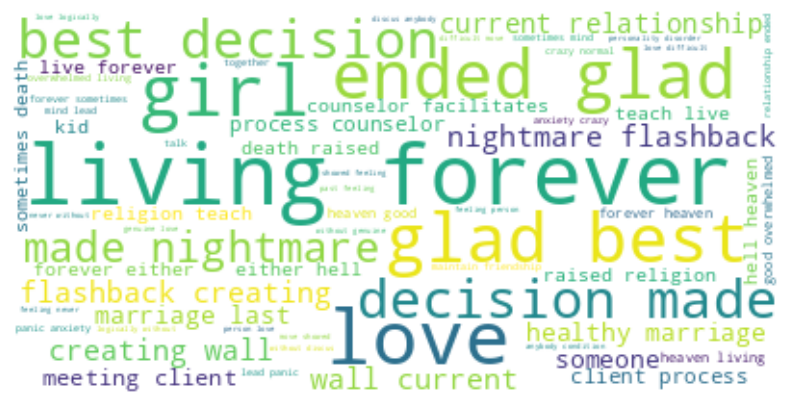

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color='white', max_words=1000).generate(df_positive['Context'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

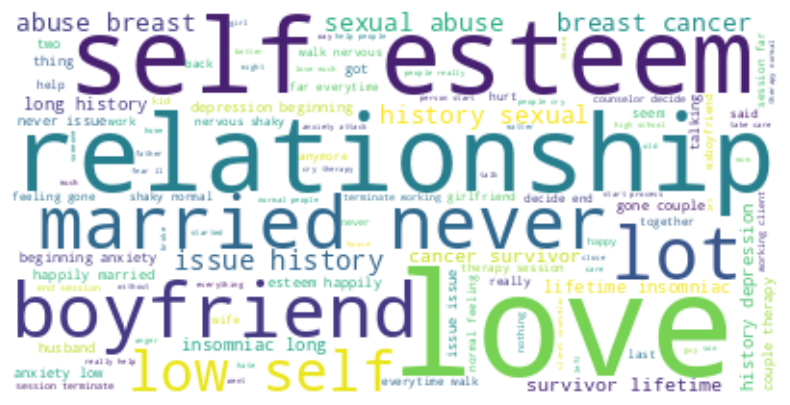

In [41]:
wordcloud = WordCloud(background_color='white', max_words=1000).generate(df_negative['Context'].str.cat(sep=' '))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()